<a href="https://colab.research.google.com/github/pol3rd/bmw_pricing_dataset/blob/main/bmw_pricing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entregable 1**

### Carga y Visualización Inicial de Datos

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Importación de Librerías para Manipulación y Análisis de Datos
import pandas as pd  # Para manipulación de datos tabulares
import numpy as np  # Para operaciones numéricas y matemáticas

# Importación de Librerías para Visualización de Datos
import matplotlib.pyplot as plt  # Para gráficos personalizados
import seaborn as sns  # Para gráficos estadísticos de alto nivel
import folium  # Para crear mapas interactivos
import plotly.express as px  # Para visualizaciones dinámicas e interactivas

# Importación de Librerías para Preprocesamiento de Datos
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # Para codificación de etiquetas y escalado de valores

# Importación de Librerías para Análisis Estadístico
from scipy.stats import chi2_contingency  # Para pruebas de chi-cuadrado

In [6]:
bmw_df = pd.read_csv("/content/drive/MyDrive/Entregables/Entregable_01_Data_Preparation/bmw_pricing_v3.csv")

bmw_df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [7]:
# Análisis de valores nulos en cada columna
bmw_df.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [8]:
bmw_df.shape

(4843, 18)

In [9]:
# Análisis detallado de cada columna
for column in bmw_df.columns:
    print(f"{column} ------------------")
    print(f"Valores Nulos: {bmw_df[column].isnull().sum()}")
    print("Frecuencia de Valores:\n", bmw_df[column].value_counts(), "\n")

marca ------------------
Valores Nulos: 970
Frecuencia de Valores:
 BMW    3873
Name: marca, dtype: int64 

modelo ------------------
Valores Nulos: 3
Frecuencia de Valores:
 320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64 

km ------------------
Valores Nulos: 2
Frecuencia de Valores:
 123492.0    2
120833.0    2
180232.0    2
124822.0    2
116708.0    2
           ..
133178.0    1
105959.0    1
193231.0    1
84058.0     1
195840.0    1
Name: km, Length: 4784, dtype: int64 

potencia ------------------
Valores Nulos: 1
Frecuencia de Valores:
 135.0    882
120.0    785
85.0     631
100.0    570
105.0    451
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: potencia, Length: 61, dtype: int64 

fecha_registro -----

In [10]:
def calcular_porcentaje_nulos(dataframe):
  # Calculo el total de filas en el dataframe
  total_filas = len(dataframe)

  # Calculo el porcentaje de valores nulos para cada columna
  porcentaje_nulos = (dataframe.isnull().sum()/total_filas)*100

  return porcentaje_nulos

Creo esta función para que me ayude a determinar un criterio basado en el porcentaje de nulos de cada columna de las que son candidatas a ser eliminadas.

In [11]:
porcentaje_nulos_por_columna = calcular_porcentaje_nulos(bmw_df)
print(porcentaje_nulos_por_columna)

marca                          20.028908
modelo                          0.061945
km                              0.041297
potencia                        0.020648
fecha_registro                 50.030973
tipo_gasolina                   0.103242
color                           9.188520
tipo_coche                     30.146603
volante_regulable               0.082593
aire_acondicionado             10.035102
camara_trasera                  0.041297
asientos_traseros_plegables    70.018584
elevalunas_electrico            0.041297
bluetooth                      15.032005
gps                             0.000000
alerta_lim_velocidad           15.032005
precio                          0.123890
fecha_venta                     0.020648
dtype: float64


In [12]:
raw_bmw_df = bmw_df.copy()

Creo una copia de seguridad para que, en caso de error, pueda recurrir al dataset sin ninguna modificación. O para realizar consultas comparativas tras la limpieza.

## **Toma de Decisiones sobre el Borrado de Columnas**

 **Columnas Eliminadas**: 'fecha_registro', 'fecha_venta', 'color', 'alerta_lim_velocidad', 'marca'



In [13]:
bmw_df = bmw_df.drop(columns = ["fecha_registro","fecha_venta","color", "alerta_lim_velocidad", "marca"])

**Justificación**:

**fecha_registro y fecha_venta**

**Fecha de registro**: más de la mitad de los datos para esta columna faltan, lo que pone en duda la utilidad y la confiabilidad de esta característica para el análisis.

**Fecha registro**: Aunque esta columna tiene solo 1 valor nulo,la mayoría de las ventas se concentran en unos pocos meses de 2018, lo que podría indicar un sesgo temporal en los datos.

**color**:
Para justificar la eliminación de la columna "color" me he basado en lo siguiente:
- **Valores nulos**: Con 445 valores nulos, hay una cantidad significativa de registros en el dataset para los cuales no se dispone de información de color. Esto puede introducir incertidumbre en el análisis y debilitar la confiabilidad de "color" como predictor del precio del vehículo.
- **Diversidad de valores** y **dificultad en la imputación**. Si decidiera rellenar los nulos con un valor predeterminado, podría introducir sesgos en el modelo. De modo que la eliminación de la columna "color" me parece una decisión más prudente.

**alterta_lim_velocidad**:
He decidido eliminar esta variable basándome en su **significativa proporción de valores nulos** de aproximadamente el 15% del total de registros. Este factor puede debilitar la capacidad de esta variable para proporcionar información fiable. Además, el hecho de que su frecuencia de valores esté tan ampliamente distribuida, con un 46,25% de valores True frente a un 38,71% de valores False, hace que imputar la moda a los datos que faltan sea un enfoque que compromete demasiado el modelo resultante.

**marca**:
Todos los vehículos de este conjunto de datos son de la misma marca (BMW). Viendo esto, podemos deducir que esta columna no variará para ningún registro y, por lo tanto, no proporcionará información útil para el análisis del conjunto de datos que contribuyen a la variabilidad del precio.

## **Manejo de Valores Nulos**

### 1) Variables con Tratamiento de Nulos Basado en Eliminación de Filas:



**- Variables Afectadas**: 'modelo', 'km', 'potencia', 'tipo_gasolina', 'volante_regulable', 'camara_trasera', 'elevalunas_electrico', 'precio'

**- Justificación**:
En este caso, la justificación para tratar las columnas mencionadas de este modo se basa en:
- a) El **bajo porcentaje de valores nulos** presentes dichas columnas.
- b) La **importabcia de las variables para el modelo**.
- c) La **complejidad de la imputación** y
- d) Tratar de lograr la **mínima pérdida de información** posible.


In [14]:
bmw_df = bmw_df.dropna(subset=["modelo", "km", "potencia", "tipo_gasolina", "volante_regulable", "camara_trasera", "elevalunas_electrico", "precio"])

### 2) Variables con Tratamiento de Nulos Basado en Imputación:



**- Variable**: 'tipo_coche'

**- Justificación**:
En primer lugar cabe destacar la **relevancia de la variable "tipo_coche"**: Asumo que diferentes tipos de coches (como sedanes, SUVs, deportivos, etc.) pueden tener diferentes rangos de precios en el mercado. Su imputación cuidadosa es crucial para mantener la integridad y la calidad del análisis.

Luego, cabe destacar la **correlación con "potencia"**: La decisión de utilizar "potencia" como base para la imputación asume que hay una correlación entre la potencia del coche y su tipo. Partiendo de la base en que (por ejemplo, los deportivos suelen ser más potentes, mientras que los coches compactos suelen tener menos potencia).



**- Estrategia**:
**Imputación basada en la moda por intervalos de potencia**:
- **Creación de intervalos de potencia**: Se divide la variable "potencia" en intervalos (Baja, Media, Alta, Muy Alta) basados en su distribución, desde la potencia mínima (25) hasta la máxima (423). Esto permite agrupar los coches en categorías basadas en su potencia.

- **Uso de la moda para imputación**: Para cada intervalo de potencia, calculo la moda de "tipo_coche", que es el tipo de coche más frecuente en ese rango de potencia. Luego, utilizo esta moda para imputar los valores nulos de "tipo_coche" dentro de cada intervalo. Tratando de minimizar el sesgo en los datos que poseo.

In [15]:
print(min(bmw_df["potencia"]))
# Vemos que hay un valor mínimo de 0, lo que no tiene sentido, ya que la potencia de un motor no puede ser negativa.
print(max(bmw_df["potencia"]))

0.0
423.0


In [16]:
bmw_df.shape[0]

4818

In [17]:
# Conteo del número de observaciones con valor de potencia igual a 0
num_observaciones_con_cero_potencia = (bmw_df['potencia'] == 0).sum()
print("Número de observaciones con potencia igual a 0:", num_observaciones_con_cero_potencia)

Número de observaciones con potencia igual a 0: 1


In [18]:
# Eliminado de las observaciones con potencia igual a 0 del dataset
bmw_df = bmw_df[bmw_df['potencia'] != 0]

In [19]:
# Verificación de que se hayan eliminado las observaciones
print("Número de observaciones después de eliminar los valores de potencia igual a 0:", len(bmw_df))

Número de observaciones después de eliminar los valores de potencia igual a 0: 4817


In [20]:
print(min(bmw_df["potencia"]))

25.0


In [21]:
# Creación de Intervalos para la variable Potencia
bmw_df['rango_potencia'] = pd.cut(bmw_df['potencia'], bins=[24, 125, 225, 325, 424], labels=['Baja', 'Media', 'Alta', 'Muy Alta'])

In [22]:
# Cálculo de la Moda de tipo_coche para cada Rango de Potencia
moda_por_rango_potencia = bmw_df.groupby('rango_potencia')['tipo_coche'].agg(lambda x: x.mode()[0])

In [23]:
# Imputación de Valores Faltantes en tipo_coche Basada en la Moda de su Rango de Potencia
bmw_df['tipo_coche'] = bmw_df.apply(lambda x: moda_por_rango_potencia[x['rango_potencia']] if pd.isnull(x['tipo_coche']) else x['tipo_coche'], axis=1)

In [24]:
bmw_df.drop("rango_potencia", axis = 1, inplace = True)

In [25]:
print(bmw_df["tipo_coche"].unique())

['estate' 'convertible' 'suv' 'coupe' 'hatchback' 'sedan' 'subcompact'
 'van']


In [26]:
bmw_df["tipo_coche"].isnull().sum()

0

**- Variable**: 'asientos_traseros_plegables'

**- Justificación**: **Relevancia de la variable para el análisis**. Esta variable puede ser importante para determinar el valor de un vehículo.

**- Estrategia**: **Correlación con "tipo_coche**. Es lógico pensar que pueda existir una relación entre el "tipo_coche" y la presencia de "asientos_traseros_plegables". Algunos tipos de coches, debido a su diseño y propósito, tienen más probabilidades de incluir características como asientos traseros plegables.

In [27]:
bmw_df["asientos_traseros_plegables"].value_counts()

False    1142
True      301
Name: asientos_traseros_plegables, dtype: int64

In [28]:
bmw_df["asientos_traseros_plegables"].isnull().sum()

3374

In [29]:
bmw_df["tipo_coche"].unique()

array(['estate', 'convertible', 'suv', 'coupe', 'hatchback', 'sedan',
       'subcompact', 'van'], dtype=object)

In [30]:
# Conteo de vehículos por 'tipo_coche' con 'asientos_traseros_plegables' True, False y NaN
conteo_asientos = bmw_df.groupby(["tipo_coche","asientos_traseros_plegables"]).size().unstack(fill_value=0)
conteo_asientos["Sin Información"] = bmw_df.groupby("tipo_coche")["asientos_traseros_plegables"].apply(lambda x: x.isna().sum())

In [31]:
conteo_asientos

asientos_traseros_plegables,False,True,Sin Información
tipo_coche,,,
convertible,9,0,21
coupe,21,3,49
estate,641,118,1731
hatchback,129,7,352
sedan,215,26,580
subcompact,28,0,49
suv,92,147,571
van,7,0,21


In [32]:
# Determino la mayoría de 'asientos_traseros_plegables' para cada 'tipo_coche' y aplico la imputación
def imputar_asientos_por_mayoria(grupo):
   # Determino si hay más True o False en 'asientos_traseros_plegables' dentro del grupo
   mayoritario = grupo['asientos_traseros_plegables'].mode()[0] if not grupo['asientos_traseros_plegables'].mode().empty else False
   # Imputo los valores nulos con el valor mayoritario
   grupo["asientos_traseros_plegables"].fillna(mayoritario, inplace = True)
   return grupo
# Aplico la función a cada grupo de 'tipo_coche'
bmw_df = bmw_df.groupby("tipo_coche", group_keys=False).apply(imputar_asientos_por_mayoria)

In [33]:
# Creación de una tabla de contingencia para 'tipo_coche' y 'asientos_traseros_plegables'
tabla_contingencia = pd.crosstab(bmw_df['tipo_coche'], bmw_df['asientos_traseros_plegables'])

# Mostrado de la tabla de contingencia
print(tabla_contingencia)

asientos_traseros_plegables  False  True 
tipo_coche                               
convertible                     30      0
coupe                           70      3
estate                        2372    118
hatchback                      481      7
sedan                          795     26
subcompact                      77      0
suv                             92    718
van                             28      0


**- Variable**: 'aire_acondicionado'

**- Justificación**: A diferencia de lo que hemos visto en el apartado de toma de decisiones sobre la eliminación de columnas donde hemos decidido eliminar la columna alert_limit_vel por la frecuencia muy distribuida de sus valores, aquí, hay un claro predominio de registros informados en los que el valor es True. Con más de un 70% de informes con este valor. Es cierto que tenemos un 10% de valores nulos, pero creo que no es un planteamiento descabellado imputar esos nulos con nuestro valor modal mayoritario.

**- Estrategia**: imputar nulos con nuestro valor modal mayoritario para esta columna en particular.

In [34]:
bmw_df.shape[0]

4817

In [35]:
porcentaje_nulos_por_columna["aire_acondicionado"]

10.035102209374354

In [36]:
bmw_df["aire_acondicionado"].value_counts()

True     3449
False     886
Name: aire_acondicionado, dtype: int64

In [37]:
bmw_df.loc[bmw_df['aire_acondicionado'].isna(), 'aire_acondicionado'] = True

In [38]:
bmw_df["aire_acondicionado"].isnull().sum()

0

**- Variable**: 'bluetooth'

**- Justificación**: Misma que para la variable 'aire_acondicionado'

**- Estrategia**: imputar nulos con nuestro valor modal mayoritario para esta columna en particular.

In [39]:
bmw_df["bluetooth"].head()

0      NaN
1     True
2    False
3     True
4     True
Name: bluetooth, dtype: object

In [40]:
bmw_df["bluetooth"].value_counts()

False    3101
True      991
Name: bluetooth, dtype: int64

In [41]:
bmw_df.loc[bmw_df['bluetooth'].isna(), 'bluetooth'] = False

In [42]:
bmw_df["bluetooth"].isnull().sum()

0

## **Revisión y Confirmación Post-Imputación**

### Verificación de Valores Nulos

In [43]:
bmw_df.isnull().sum()

modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
precio                         0
dtype: int64

## **Análisis univariable**

### Análisis univariable de variables numéricas
Basado en los siguientes puntos:
**1. Estadísticas descriptivas**

Sacaré:
- la media
- la mediana
- la desviación estandard

**2. Visualización de datos**

Mediante un histograma que me permita entender los insights más relevantes.

**3. Identificación de valores atípicos**

Usaré el rango intercuartílico (IQR) para definir umbrales a partir de los cuales considerar posibles outliers.

####**Análisis univariable de la variable "precio"**

**1. Estadísticas descriptivas**

In [44]:
bmw_df['precio'].dtypes

dtype('float64')

In [45]:
# Calculo de la media
media = np.mean(bmw_df['precio'])

print("La media es:", media)

La media es: 15840.27402947893


In [46]:
# Calculo de la mediana
median = np.median(bmw_df['precio'])

print("La mediana es:", median)

La mediana es: 14200.0


In [47]:
# Calculo de la desviación estándar
desviacion_estandar = np.std(bmw_df['precio'])

print("La desviación estándar es:", desviacion_estandar)

La desviación estándar es: 9223.439407875441


**2. Visualización de datos**

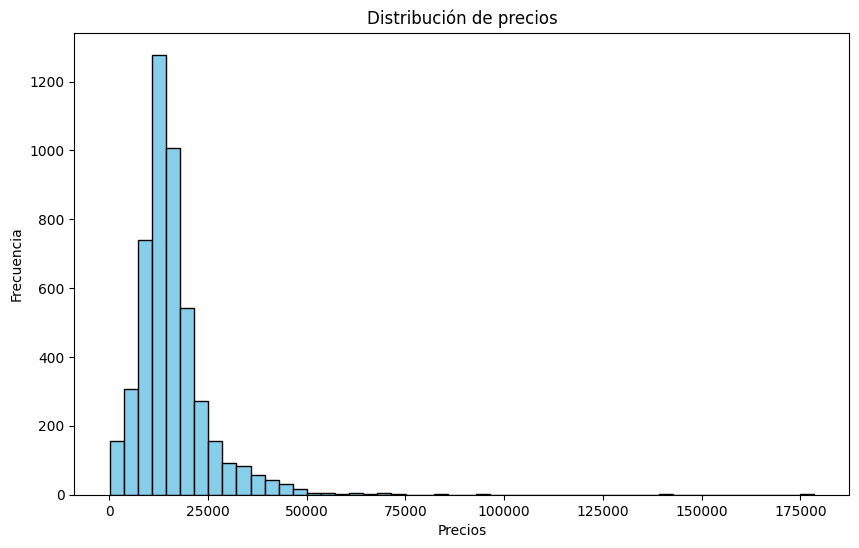

In [48]:
# Creación un histograma para la columna 'precio'
plt.figure(figsize=(10, 6))  # Ajuste del tamaño de la figura
plt.hist(bmw_df['precio'], bins=50, color='skyblue', edgecolor='black')  # Histograma con 50 bins
plt.title('Distribución de precios')  # Título del gráfico
plt.xlabel('Precios')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y
plt.show()  # Mostrado del gráfico

**3. Identificación de valores atípicos**

In [49]:
# Calculo el primer cuartil (25%)
Q1 = bmw_df['precio'].quantile(0.25)

# Calculo el tercer cuartil (75%)
Q3 = bmw_df['precio'].quantile(0.75)

# Calculo el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Defino los límites para los outliers
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Impresión de estos valores para filtrar tu DataFrame
print(f"Primer cuartil (Q1): {Q1}")
print(f"Tercer cuartil (Q3): {Q3}")
print(f"Rango intercuartílico (IQR): {IQR}")
print(f"Límite superior para outliers: {limite_superior}")
print(f"Límite inferior para outliers: {limite_inferior}")

Primer cuartil (Q1): 10800.0
Tercer cuartil (Q3): 18600.0
Rango intercuartílico (IQR): 7800.0
Límite superior para outliers: 30300.0
Límite inferior para outliers: -900.0


In [50]:
print(bmw_df['precio'].min())
print(bmw_df['precio'].max())

100.0
178500.0


In [51]:
len(bmw_df[bmw_df["precio"]<500.0].sort_values(by='precio', ascending=True))

14

Tengo 14 registros de coches que ni siquiera llegaron a los 500 euros de precio de venta. En este caso y por contexto, suponiendo que probablemente se trate de un concesionario de coches de segunda mano (por la distribución de precios) y sabiendo que se venden coches bmw, creo que no tiene mucho sentido no prescindir de los registros de coches con un tipo de valor inferior al citado, ya que no tiene mucho sentido a nivel negocio. Además, para el conjunto de datos es sólo el 0,29% de mis datos a eliminar, por lo que no causará un gran impacto en el conjunto de datos en general.

In [52]:
print("El número de registros del dataset antes de eliminar los registros es:", len(bmw_df))
bmw_df = bmw_df[bmw_df["precio"]>500.0]
print("El número de registros del dataset tras el eliminado es:", len(bmw_df))

El número de registros del dataset antes de eliminar los registros es: 4817
El número de registros del dataset tras el eliminado es: 4801


En este caso no voy a eliminar todos estos registros, ya que al ser venta de coches, y haber tantos modelos de coches diferentes en distintas gamas, no es descabellado pensar que haya coches mucho más caros que otros.

Sólo hay dos matriculaciones que superan los 100.000 euros, lo que no es tan extremo para los coches.

####**Análisis univariable de la variable "km"**

**1. Estadísticas descriptivas**

In [53]:
bmw_df['km'].dtypes

dtype('float64')

In [54]:
# Calculo la media
media = np.mean(bmw_df['km'])

print("La media es:", media)

La media es: 140624.51801707977


In [55]:
# Calculo la mediana
mediana = np.median(bmw_df['km'])

print("La mediana es:", mediana)

La mediana es: 140752.0


In [56]:
# Calculo la desviación estándar
desviacion_estandar = np.std(bmw_df['km'])

print("La desviación estándar es:", desviacion_estandar)

La desviación estándar es: 59729.99207527463


**2. Visualización de datos**

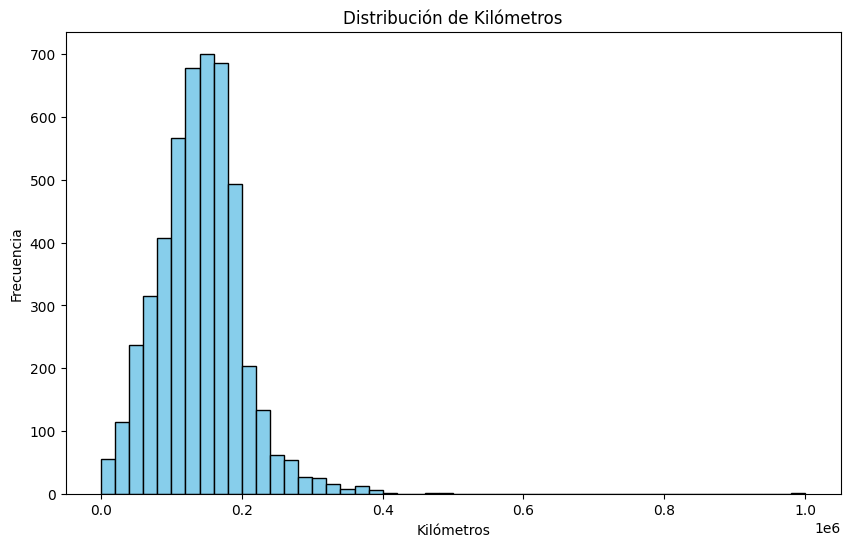

In [57]:
# Creación un histograma para la columna 'km'
plt.figure(figsize=(10, 6))  # Ajuste del tamaño de la figura
plt.hist(bmw_df['km'], bins=50, color='skyblue', edgecolor='black')  # Histograma con 50 bins
plt.title('Distribución de Kilómetros')  # Título del gráfico
plt.xlabel('Kilómetros')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y
plt.show()  # Mostrado del gráfico

**3. Identificación de valores atípicos**

In [58]:
# Calculo el primer cuartil (25%)
Q1 = bmw_df['km'].quantile(0.25)

# Calculo el tercer cuartil (75%)
Q3 = bmw_df['km'].quantile(0.75)

# Calculo el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Defino los límites para los outliers
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Impresión de valores para filtrar tu DataFrame
print(f"Primer cuartil (Q1): {Q1}")
print(f"Tercer cuartil (Q3): {Q3}")
print(f"Rango intercuartílico (IQR): {IQR}")
print(f"Límite superior para outliers: {limite_superior}")
print(f"Límite inferior para outliers: {limite_inferior}")


Primer cuartil (Q1): 102735.0
Tercer cuartil (Q3): 175118.0
Rango intercuartílico (IQR): 72383.0
Límite superior para outliers: 283692.5
Límite inferior para outliers: -5839.5


El límite inferior para outliers es negativo, lo que no tiene sentido en el contexto de kilómetros de un vehículo, ya que no podemos tener kilómetros negativos. Por lo tanto, en la práctica, solo consideraré el límite superior para identificar outliers. Sin embargo, veamos si hay algún valor negativo de kilometraje por si acaso, ya que eso sería motivo para borrar ese registro.

In [59]:
bmw_df[bmw_df['km']<0] # Localizamos posibles errores en la colecta de datos

,modelo,km,potencia,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,precio
2938,640 Gran Coupé,-64.0,230.0,diesel,sedan,True,True,False,False,False,False,True,75000.0


In [60]:
bmw_df['km'].shape[0] # Contamos el número de registros totales en "km".

4801

In [61]:
bmw_df = bmw_df[bmw_df['km']>0] # Descartamos este registro erróneo visto anteriormente.

In [62]:
bmw_df['km'].shape[0] # Comprobamos haberlo eliminado correctamente.

4800

In [63]:
bmw_df[bmw_df['km']>283846.0] # detección de outliers segun mi límite superior para outliers

,modelo,km,potencia,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,precio
56,320,329173.0,110.0,diesel,estate,True,False,False,False,False,False,True,2300.0
100,320,342768.0,135.0,diesel,estate,False,True,False,False,True,False,True,8200.0
179,320,302525.0,100.0,diesel,estate,False,True,False,False,False,False,True,1000.0
262,318,319724.0,90.0,diesel,estate,True,False,False,False,False,False,True,3000.0
450,525,316855.0,150.0,diesel,estate,True,True,True,False,True,False,True,9400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4609,X1,290306.0,105.0,diesel,estate,True,True,False,False,True,False,True,14000.0
4618,X6,295953.0,225.0,diesel,estate,True,True,True,True,True,False,True,22000.0
4643,X6,296257.0,225.0,diesel,suv,True,True,True,True,True,False,True,22000.0
4724,X5,364547.0,261.0,petrol,suv,True,True,True,True,True,False,True,11300.0


In [64]:
bmw_df[bmw_df['km']>283846.0].sort_values(by='km', ascending=False).head(1) # Valor outlier Máximo

,modelo,km,potencia,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,precio
3732,118,1000376.0,90.0,diesel,estate,True,False,False,False,False,False,True,1400.0


97 registros superan mi límite superior para detectar valores atípicos basado en el rango intercuartílico (IQR). En realidad, se trata sólo del 2% del total de registros, y como no tengo forma de comprobar si se trata de un error en la recogida de datos o si realmente es así, optaré por excluir estos valores de mi conjunto de datos.

In [65]:
bmw_df = bmw_df[bmw_df['km']<283846.0] # 4816 - 97 (los registros a eliminar)

In [66]:
bmw_df['km'].shape[0] # Comprobamos una vez más que los hemos eliminado correctamente.

4709

####**Análisis univariable de la variable "potencia"**

**1. Estadísticas descriptivas**

In [67]:
bmw_df["potencia"].dtypes

dtype('float64')

In [68]:
# Calculo la media
media = np.mean(bmw_df['potencia'])

print("La media es:", media)

La media es: 129.0552134211085


In [69]:
# Calculo la mediana
mediana = np.median(bmw_df['potencia'])

print("La media es:", mediana)

La media es: 120.0


In [70]:
# Calculo la desviación estándar
desviacion_estandar = np.std(bmw_df['potencia'])

print("La desviación estándar es:", desviacion_estandar)

La desviación estándar es: 38.97257598102047


**2. Visualización de datos**

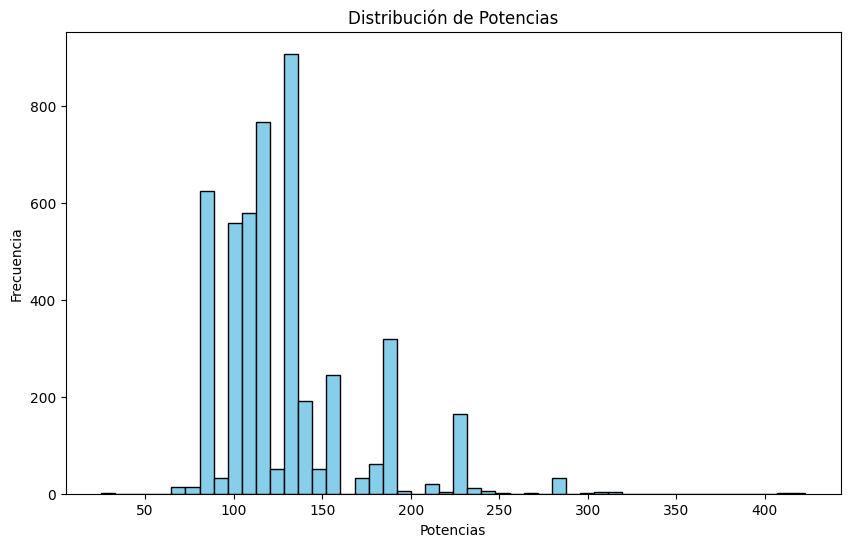

In [71]:
# Creo un histograma para la columna 'potencia'
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
plt.hist(bmw_df['potencia'], bins=50, color='skyblue', edgecolor='black')  # Histograma con 50 bins
plt.title('Distribución de Potencias')  # Título del gráfico
plt.xlabel('Potencias')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y
plt.show()  # Mostrado del gráfico

**3. Identificación de valores atípicos**

In [72]:
# Calculo el primer cuartil (25%)
Q1 = bmw_df['potencia'].quantile(0.25)

# Calculo el tercer cuartil (75%)
Q3 = bmw_df['potencia'].quantile(0.75)

# Calculo el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Defino los límites para los outliers
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Valores para filtrado del DataFrame
print(f"Primer cuartil (Q1): {Q1}")
print(f"Tercer cuartil (Q3): {Q3}")
print(f"Rango intercuartílico (IQR): {IQR}")
print(f"Límite superior para outliers: {limite_superior}")
print(f"Límite inferior para outliers: {limite_inferior}")


Primer cuartil (Q1): 100.0
Tercer cuartil (Q3): 135.0
Rango intercuartílico (IQR): 35.0
Límite superior para outliers: 187.5
Límite inferior para outliers: 47.5


In [73]:
bmw_df[bmw_df["potencia"]>187.5]

,modelo,km,potencia,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,precio
1,M4,13929.0,317.0,petrol,convertible,True,True,False,False,False,True,True,69700.0
5,335,152352.0,225.0,petrol,estate,True,True,False,False,True,True,True,17100.0
17,650,24521.0,270.0,petrol,convertible,True,False,False,False,False,False,True,9200.0
20,135,126213.0,225.0,petrol,convertible,False,False,False,False,False,True,True,16800.0
26,430,113678.0,190.0,diesel,estate,True,True,False,False,True,False,True,30100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4789,X3,97835.0,190.0,diesel,estate,True,True,True,False,False,False,False,5400.0
4793,X5 M,125197.0,230.0,diesel,suv,True,True,True,True,True,True,True,42700.0
4795,X5,87745.0,230.0,diesel,suv,True,True,True,True,False,True,True,44700.0
4796,X5,111962.0,190.0,diesel,suv,True,True,False,True,True,False,True,26500.0


En este caso, el número de registros que habría que eliminar con el procedimiento habitual sería aproximadamente el 12% del valor total de los registros (577 filas). Además, si aplicamos la lógica de mercado, tiene sentido que existan valores elevados para la distribución de potencia debido a la gran variedad de modelos del conjunto de datos, incluidos los modelos deportivos entre otros. Así pues, esta vez optaré por un enfoque más conservador sin eliminar las filas que se ven en el cuadro anterior.

In [74]:
bmw_df[bmw_df["potencia"]<47.5]

,modelo,km,potencia,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,precio
1796,i3,152328.0,25.0,hybrid_petrol,estate,False,True,False,False,False,False,True,20300.0
1925,i3,152470.0,25.0,hybrid_petrol,hatchback,False,True,False,False,False,False,True,15500.0


Sin embargo, los valores de potencia de 25cv aparentemente tienen menos sentido y son sólo dos valores, por lo que procederé a eliminarlos.

In [75]:
bmw_df["potencia"].shape[0]

4709

In [76]:
bmw_df = bmw_df[bmw_df["potencia"]>47.5]

In [77]:
bmw_df["potencia"].shape[0]

4707

### Análisis univariable de variables de cadenas

####**Análisis univariable de la variable "modelo"**

Basado en los siguientes puntos:

**1. Longitud de las cadenas**

**2. Conteo de valores únicos**

**3. Visualizar la distribución de los datos**



**1. Longitud de las cadenas**

In [78]:
bmw_df["modelo"].dtypes

dtype('O')

In [79]:
# Calculo de la longitud de las cadenas en la columna 'modelo'
longitudes_modelo = bmw_df['modelo'].str.len()

# Verificación de los primeros elementos para asegurarte de que el cálculo fue exitoso
print(longitudes_modelo.head())

0    3
1    2
2    3
3    3
4    3
Name: modelo, dtype: int64


**2. Conteo de valores únicos**

In [80]:
# Conteo de los valores únicos en la columna 'modelo'
conteo_modelo = bmw_df['modelo'].value_counts()

In [81]:
conteo_modelo

320                720
520                611
318                548
X3                 436
116                357
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64

In [82]:
bmw_df["modelo"].shape[0]*1/100 # 47 es el 1%

47.07

Voy a imputar como 'otros' todos aquellos valores que no alcancen un recuento de 47 registros de un determinado modelo dentro de esa misma columna, ya que implican baja varianza al no alcanzar ni el 1% de registros con ese mismo valor. En realidad este paso debería haberlo hecho antes pero me he dado cuenta en este punto del análisis univariante así que procedo a hacerlo aquí.

In [83]:
# Establecer un umbral para determinar qué se considera un modelo raro
umbral_modelos_raros = 47

# Creación de una nueva columna donde los modelos raros serán etiquetados como 'Otros'
bmw_df['modelo_agrupado'] = bmw_df['modelo'].apply(lambda x: x if conteo_modelo[x] >= umbral_modelos_raros else 'Otros')

# Ahora la columna 'modelo_agrupado' tiene los modelos comunes con sus nombres originales y los modelos raros agrupados como 'Otros'

<ipython-input-83-5d7d54a857ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmw_df['modelo_agrupado'] = bmw_df['modelo'].apply(lambda x: x if conteo_modelo[x] >= umbral_modelos_raros else 'Otros')


In [84]:
bmw_df['modelo_agrupado'].value_counts()

320                 720
Otros               611
520                 611
318                 548
X3                  436
116                 357
X1                  271
316                 230
X5                  225
525                 174
530                 149
118                 139
318 Gran Turismo     97
320 Gran Turismo     73
518                  66
Name: modelo_agrupado, dtype: int64

In [85]:
bmw_df.head(3) # Comprobamos tener la nueva variable 'modelo_agrupado'

,modelo,km,potencia,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,precio,modelo_agrupado
0,118,140411.0,100.0,diesel,estate,True,True,False,False,True,False,True,11300.0,118
1,M4,13929.0,317.0,petrol,convertible,True,True,False,False,False,True,True,69700.0,Otros
2,320,183297.0,120.0,diesel,estate,False,False,False,False,True,False,True,10200.0,320


In [86]:
bmw_df = bmw_df.drop(columns = ["modelo"]) # Eliminado de la columna 'model'

In [87]:
bmw_df.head(3) # Verificamos el eliminado de la columna 'model'

,km,potencia,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,precio,modelo_agrupado
0,140411.0,100.0,diesel,estate,True,True,False,False,True,False,True,11300.0,118
1,13929.0,317.0,petrol,convertible,True,True,False,False,False,True,True,69700.0,Otros
2,183297.0,120.0,diesel,estate,False,False,False,False,True,False,True,10200.0,320


**3. Visualizar la distribución de los datos**

In [88]:
conteo_modelo_agrupado = bmw_df['modelo_agrupado'].value_counts()

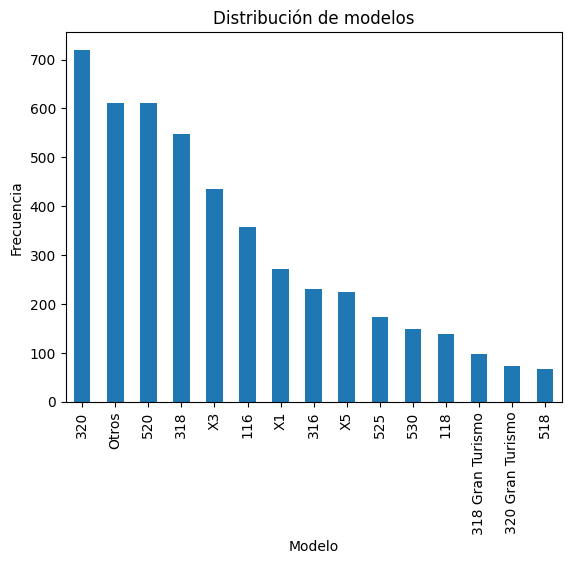

In [89]:
# Visualición la distribución de los datos utilizando un gráfico de barras
conteo_modelo_agrupado.plot(kind='bar')
plt.xlabel('Modelo')
plt.ylabel('Frecuencia')
plt.title('Distribución de modelos')
plt.show()

####**Análisis univariable de la variable "tipo_gasolina"**

**1. Longitud de las cadenas**

In [90]:
bmw_df['tipo_gasolina'].dtypes

dtype('O')

In [91]:
# Calculo de la longitud de las cadenas en la columna 'tipo_gasolina'
longitudes_tipo_gasolina = bmw_df['tipo_gasolina'].str.len()

# Verificación de los primeros elementos para asegurarte de que el cálculo fue exitoso
print(longitudes_tipo_gasolina.head())

0    6
1    6
2    6
3    6
4    6
Name: tipo_gasolina, dtype: int64


**2. Conteo de valores únicos**

In [92]:
# Contado de los valores únicos en la columna 'tipo_gasolina'
conteo_tipo_gasolina = bmw_df['tipo_gasolina'].value_counts()
conteo_tipo_gasolina

diesel           4511
petrol            182
hybrid_petrol       6
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [93]:
bmw_df['tipo_gasolina'] = bmw_df['tipo_gasolina'].str.lower()
# Convertimos diesel y Diesel en el mismo subregistro

In [94]:
# Repetimos el mismo proceso con el cambio de la celda anterior
conteo_tipo_gasolina = bmw_df['tipo_gasolina'].value_counts()
conteo_tipo_gasolina

diesel           4516
petrol            182
hybrid_petrol       6
electro             3
Name: tipo_gasolina, dtype: int64

**3. Visualizar la distribución de los datos**

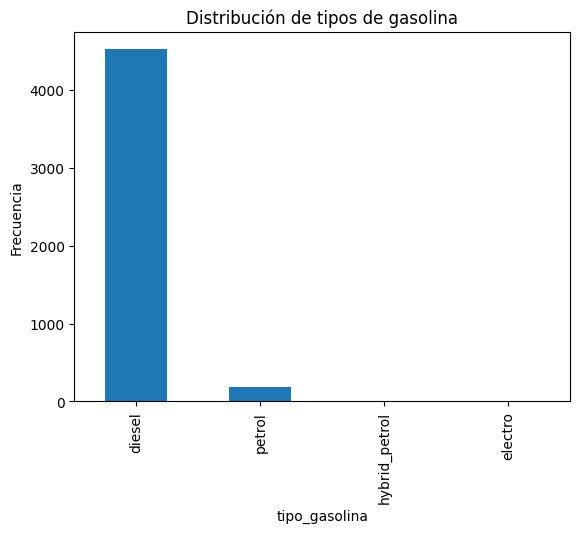

In [95]:
# Visualización de la distribución de los datos utilizando un gráfico de barras
conteo_tipo_gasolina.plot(kind='bar')
plt.xlabel('tipo_gasolina')
plt.ylabel('Frecuencia')
plt.title('Distribución de tipos de gasolina')
plt.show()

####**Análisis univariable de la variable "tipo_coche"**

**1. Longitud de las cadenas**

In [96]:
bmw_df['tipo_coche'].dtypes

dtype('O')

In [97]:
# Calculo de la longitud de las cadenas en la columna 'tipo_coche'
longitudes_tipo_coche = bmw_df['tipo_coche'].str.len()

# Verificado de los primeros elementos para asegurarte de que el cálculo fue exitoso
print(longitudes_tipo_coche.head())

0     6
1    11
2     6
3    11
4     6
Name: tipo_coche, dtype: int64


**2. Conteo de valores únicos**

In [98]:
# Conteo de los valores únicos en la columna 'tipo_coche'
conteo_tipo_coche = bmw_df['tipo_coche'].value_counts()
conteo_tipo_coche

estate         2423
suv             804
sedan           793
hatchback       480
subcompact       76
coupe            73
convertible      30
van              28
Name: tipo_coche, dtype: int64

**3. Visualizar la distribución de los datos**

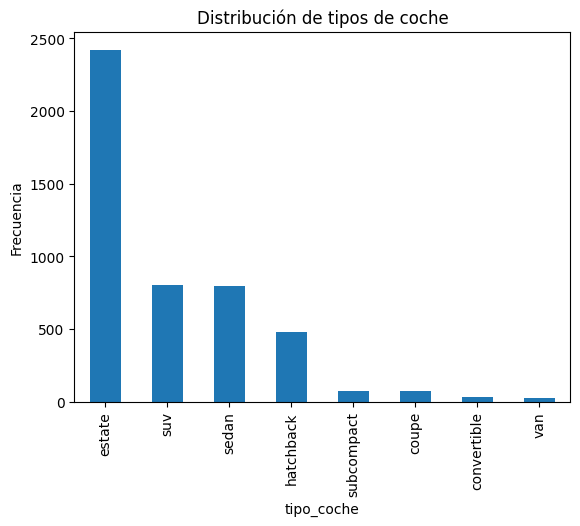

In [99]:
# Visualizción la distribución de los datos utilizando un gráfico de barras
conteo_tipo_coche.plot(kind='bar')
plt.xlabel('tipo_coche')
plt.ylabel('Frecuencia')
plt.title('Distribución de tipos de coche')
plt.show()

### Análisis univariable de variables booleanas

####**Análisis univariable de la variable "volante_regulable"**

**1. Proporción de valores verdaderos y falsos**

In [100]:
bmw_df['volante_regulable'].dtypes

dtype('O')

In [101]:
bmw_df['volante_regulable'].head(2)

0    True
1    True
Name: volante_regulable, dtype: object

In [102]:
bmw_df['volante_regulable'].value_counts()

True     2581
False    2126
Name: volante_regulable, dtype: int64

In [103]:
volante_regulable_true = (len(bmw_df[bmw_df['volante_regulable']==True])/(bmw_df['volante_regulable'].shape[0])*100)
volante_regulable_false =(len(bmw_df[bmw_df['volante_regulable']==False])/(bmw_df['volante_regulable'].shape[0])*100)

print(f'La proporción de coches con volante regulable es: {volante_regulable_true}')
print(f'La proporción de coches sin volante regulable es: {volante_regulable_false}')

La proporción de coches con volante regulable es: 54.83322710856172
La proporción de coches sin volante regulable es: 45.166772891438285


**2. Visualización de la distribución de los datos**

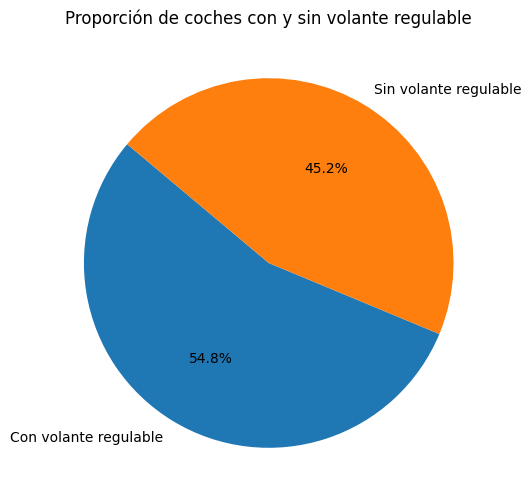

In [104]:
# Datos
proporciones = [volante_regulable_true, volante_regulable_false]
nombres = ['Con volante regulable', 'Sin volante regulable']

# Diagrama de pastel
plt.figure(figsize=(6, 6))
plt.pie(proporciones, labels=nombres, autopct='%1.1f%%', startangle=140)

# Título
plt.title('Proporción de coches con y sin volante regulable')

# Mostrado del diagrama de pastel
plt.show()

####**Análisis univariable de la variable "aire_acondicionado"**

**1. Proporción de valores verdaderos y falsos**

In [105]:
bmw_df['aire_acondicionado'].dtypes

dtype('O')

In [106]:
bmw_df['aire_acondicionado'].head(2)

0    True
1    True
Name: aire_acondicionado, dtype: object

In [107]:
bmw_df['aire_acondicionado'].value_counts()

True     3858
False     849
Name: aire_acondicionado, dtype: int64

In [108]:
aire_acondicionado_true = (len(bmw_df[bmw_df['aire_acondicionado']==True])/(bmw_df['aire_acondicionado'].shape[0])*100)
aire_acondicionado_false =(len(bmw_df[bmw_df['aire_acondicionado']==False])/(bmw_df['aire_acondicionado'].shape[0])*100)

print(f'La proporción de coches con aire acondicionado es: {aire_acondicionado_true}')
print(f'La proporción de coches sin aire acondicionado es: {aire_acondicionado_false}')

La proporción de coches con aire acondicionado es: 81.96303377947739
La proporción de coches sin aire acondicionado es: 18.036966220522626


**2. Visualización de la distribución de los datos**

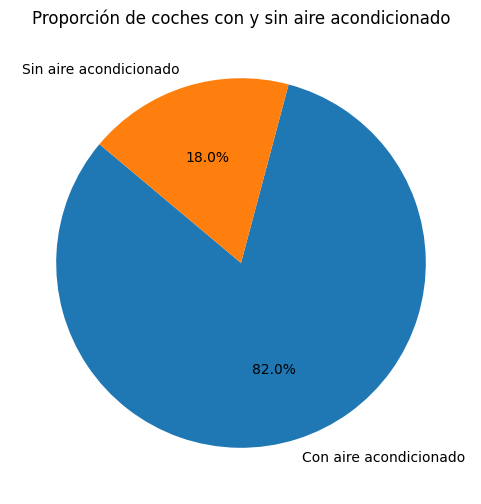

In [109]:
# Datos
proporciones = [aire_acondicionado_true, aire_acondicionado_false]
nombres = ['Con aire acondicionado', 'Sin aire acondicionado']

# Diagrama de pastel
plt.figure(figsize=(6, 6))
plt.pie(proporciones, labels=nombres, autopct='%1.1f%%', startangle=140)

# Título
plt.title('Proporción de coches con y sin aire acondicionado')

# Mostrado del diagrama de pastel
plt.show()

####**Análisis univariable de la variable "camara_trasera"**

**1. Proporción de valores verdaderos y falsos**

In [110]:
bmw_df['camara_trasera'].dtypes

dtype('O')

In [111]:
bmw_df['camara_trasera'].head(2)

0    False
1    False
Name: camara_trasera, dtype: object

In [112]:
bmw_df['camara_trasera'].value_counts()

False    3763
True      944
Name: camara_trasera, dtype: int64

In [113]:
camara_trasera_true = (len(bmw_df[bmw_df['camara_trasera']==True])/(bmw_df['camara_trasera'].shape[0])*100)
camara_trasera_false =(len(bmw_df[bmw_df['camara_trasera']==False])/(bmw_df['camara_trasera'].shape[0])*100)

print(f'La proporción de coches con camara trasera es: {camara_trasera_true}')
print(f'La proporción de coches sin camara trasera es: {camara_trasera_false}')

La proporción de coches con camara trasera es: 20.055236881240706
La proporción de coches sin camara trasera es: 79.9447631187593


**2. Visualización de la distribución de los datos**

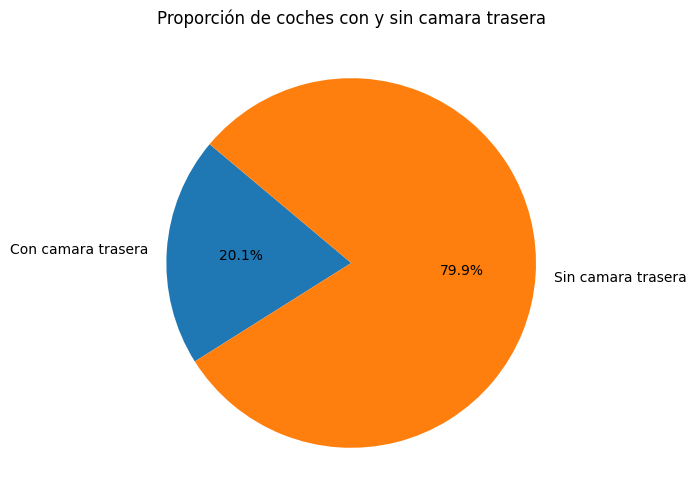

In [114]:
# Datos
proporciones = [camara_trasera_true, camara_trasera_false]
nombres = ['Con camara trasera', 'Sin camara trasera']

# Diagrama de pastel
plt.figure(figsize=(6, 6))
plt.pie(proporciones, labels=nombres, autopct='%1.1f%%', startangle=140)

# Título
plt.title('Proporción de coches con y sin camara trasera')

# Mostrado del diagrama de pastel
plt.show()

####**Análisis univariable de la variable "asientos_traseros_plegables"**

**1. Proporción de valores verdaderos y falsos**

In [115]:
bmw_df['asientos_traseros_plegables'].dtypes

dtype('bool')

In [116]:
bmw_df['asientos_traseros_plegables'].value_counts()

False    3843
True      864
Name: asientos_traseros_plegables, dtype: int64

In [117]:
asientos_traseros_plegables_true = (len(bmw_df[bmw_df['asientos_traseros_plegables']==True])/(bmw_df['asientos_traseros_plegables'].shape[0])*100)
asientos_traseros_plegables_false =(len(bmw_df[bmw_df['asientos_traseros_plegables']==False])/(bmw_df['asientos_traseros_plegables'].shape[0])*100)

print(f'La proporción de coches con asientos traseros plegables es: {asientos_traseros_plegables_true}')
print(f'La proporción de coches sin asientos traseros plegables es: {asientos_traseros_plegables_false}')

La proporción de coches con asientos traseros plegables es: 18.35564053537285
La proporción de coches sin asientos traseros plegables es: 81.64435946462714


**2. Visualización de la distribución de los datos**

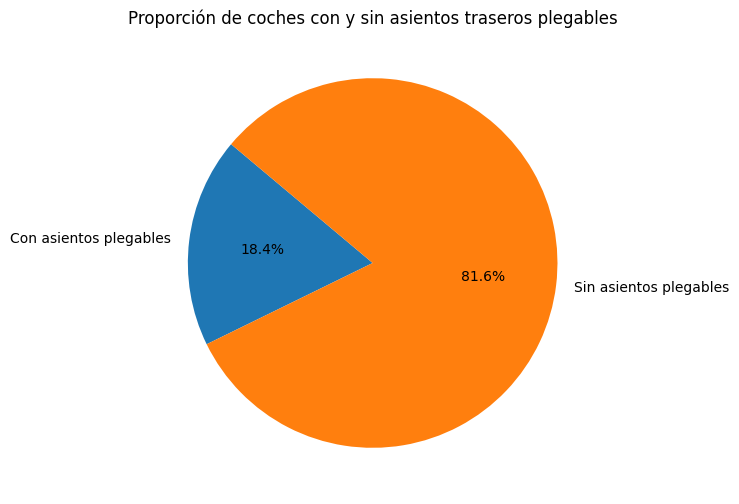

In [118]:
# Datos
proporciones = [asientos_traseros_plegables_true, asientos_traseros_plegables_false]
nombres = ['Con asientos plegables', 'Sin asientos plegables']

# Diagrama de pastel
plt.figure(figsize=(6, 6))
plt.pie(proporciones, labels=nombres, autopct='%1.1f%%', startangle=140)

# Título
plt.title('Proporción de coches con y sin asientos traseros plegables')

# Mostrado del diagrama de pastel
plt.show()

####**Análisis univariable de la variable "elevalunas_electrico"**

**1. Proporción de valores verdaderos y falsos**

In [119]:
bmw_df['elevalunas_electrico'].dtypes

dtype('O')

In [120]:
bmw_df['elevalunas_electrico'].value_counts()

False    2530
True     2177
Name: elevalunas_electrico, dtype: int64

In [121]:
elevalunas_electrico_true = (len(bmw_df[bmw_df['elevalunas_electrico']==True])/(bmw_df['elevalunas_electrico'].shape[0])*100)
elevalunas_electrico_false =(len(bmw_df[bmw_df['elevalunas_electrico']==False])/(bmw_df['elevalunas_electrico'].shape[0])*100)

print(f'La proporción de coches con elevalunas electrico es: {elevalunas_electrico_true}')
print(f'La proporción de coches sin elevalunas electrico es: {elevalunas_electrico_false}')

La proporción de coches con elevalunas electrico es: 46.25026556192904
La proporción de coches sin elevalunas electrico es: 53.74973443807096


**2. Visualización de la distribución de los datos**

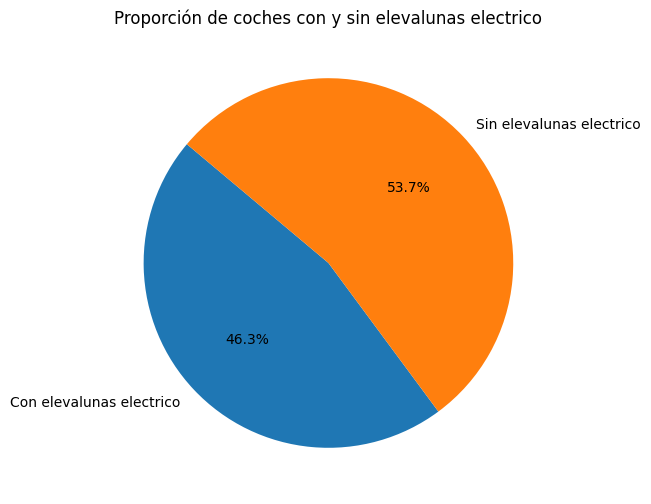

In [122]:
# Datos
proporciones = [elevalunas_electrico_true, elevalunas_electrico_false]
nombres = ['Con elevalunas electrico', 'Sin elevalunas electrico']

# Diagrama de pastel
plt.figure(figsize=(6, 6))
plt.pie(proporciones, labels=nombres, autopct='%1.1f%%', startangle=140)

# Título
plt.title('Proporción de coches con y sin elevalunas electrico')

# Mostrado del diagrama de pastel
plt.show()

####**Análisis univariable de la variable "bluetooth"**

**1. Proporción de valores verdaderos y falsos**

In [123]:
bmw_df['bluetooth'].dtypes

dtype('O')

In [124]:
bmw_df['bluetooth'].head(2)

0    False
1     True
Name: bluetooth, dtype: object

In [125]:
bmw_df['bluetooth'].value_counts()

False    3723
True      984
Name: bluetooth, dtype: int64

In [126]:
bluetooth_true = (len(bmw_df[bmw_df['bluetooth']==True])/(bmw_df['bluetooth'].shape[0])*100)
bluetooth_false =(len(bmw_df[bmw_df['bluetooth']==False])/(bmw_df['bluetooth'].shape[0])*100)

print(f'La proporción de coches con bluetooth es: {bluetooth_true}')
print(f'La proporción de coches sin bluetooth es: {bluetooth_false}')

La proporción de coches con bluetooth es: 20.905035054174633
La proporción de coches sin bluetooth es: 79.09496494582537


**2. Visualización de la distribución de los datos**

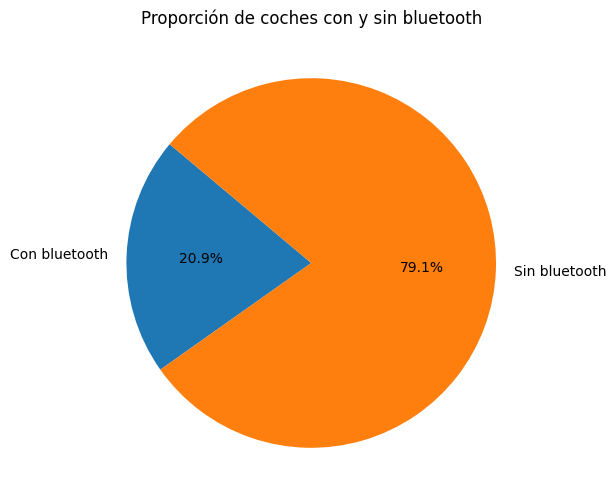

In [127]:
# Datos
proporciones = [bluetooth_true, bluetooth_false]
nombres = ['Con bluetooth', 'Sin bluetooth']

# Diagrama de pastel
plt.figure(figsize=(6, 6))
plt.pie(proporciones, labels=nombres, autopct='%1.1f%%', startangle=140)

# Título
plt.title('Proporción de coches con y sin bluetooth')

# Mostrado del diagrama de pastel
plt.show()

####**Análisis univariable de la variable "gps"**

**1. Proporción de valores verdaderos y falsos**

In [128]:
bmw_df['gps'].dtypes

dtype('bool')

In [129]:
bmw_df['gps'].value_counts()

True     4386
False     321
Name: gps, dtype: int64

In [130]:
gps_true = (len(bmw_df[bmw_df['gps']==True])/(bmw_df['gps'].shape[0])*100)
gps_false =(len(bmw_df[bmw_df['gps']==False])/(bmw_df['gps'].shape[0])*100)

print(f'La proporción de coches con gps es: {gps_true}')
print(f'La proporción de coches sin gps es: {gps_false}')

La proporción de coches con gps es: 93.18036966220524
La proporción de coches sin gps es: 6.8196303377947745


**2. Visualización de la distribución de los datos**

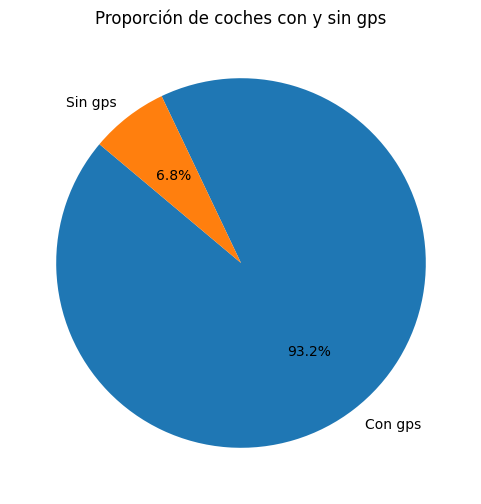

In [131]:
# Datos
proporciones = [gps_true, gps_false]
nombres = ['Con gps', 'Sin gps']

# Diagrama de pastel
plt.figure(figsize=(6, 6))
plt.pie(proporciones, labels=nombres, autopct='%1.1f%%', startangle=140)

# Título
plt.title('Proporción de coches con y sin gps')

# Mostrado del diagrama de pastel
plt.show()

## **Análisis de correlación inicial**

In [132]:
bmw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4707 entries, 0 to 4842
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4707 non-null   float64
 1   potencia                     4707 non-null   float64
 2   tipo_gasolina                4707 non-null   object 
 3   tipo_coche                   4707 non-null   object 
 4   volante_regulable            4707 non-null   object 
 5   aire_acondicionado           4707 non-null   object 
 6   camara_trasera               4707 non-null   object 
 7   asientos_traseros_plegables  4707 non-null   bool   
 8   elevalunas_electrico         4707 non-null   object 
 9   bluetooth                    4707 non-null   object 
 10  gps                          4707 non-null   bool   
 11  precio                       4707 non-null   float64
 12  modelo_agrupado              4707 non-null   object 
dtypes: bool(2), float6

### Conversión de categorías con valores True y False categorizadas como 'object' a 'bool'.

####**Conversión dtype de "elevalunas_electrico" a bool**

Para realizar el análisis de correlación, primero me encuentro con que hay columnas con valores True y False respectivamente que estan siendo categorizadas como 'object'. Voy a ajustar esto mismo.

In [133]:
# Me aseguro de que solo haya valores 'True' y 'False' en la columna:
print(bmw_df['elevalunas_electrico'].unique())

[True False]


In [134]:
# Convierto la columna a tipo bool:
bmw_df['elevalunas_electrico'] = bmw_df['elevalunas_electrico'].astype(bool)

# Verifico el cambio en el tipo de datos:
print(bmw_df['elevalunas_electrico'].dtype)

bool


####**Conversión dtype de "volante_regulable" a bool**

In [135]:
print(bmw_df['volante_regulable'].dtype)
print(bmw_df['volante_regulable'].unique())

object
[True False]


In [136]:
# Convierto la columna a tipo bool:
bmw_df['volante_regulable'] = bmw_df['volante_regulable'].astype(bool)

# Verifico el cambio en el tipo de datos:
print(bmw_df['volante_regulable'].dtype)

bool


####**Conversión dtype de "aire_acondicionado" a bool**

In [137]:
print(bmw_df['aire_acondicionado'].dtype)
print(bmw_df['aire_acondicionado'].unique())

object
[True False]


In [138]:
  # Convierto la columna a tipo bool:
  bmw_df['aire_acondicionado'] = bmw_df['aire_acondicionado'].astype(bool)

  # Verifico el cambio en el tipo de datos:
  print(bmw_df['aire_acondicionado'].dtype)

bool


####**Conversión dtype de "camara_trasera" a bool**

In [139]:
print(bmw_df['camara_trasera'].dtype)
print(bmw_df['camara_trasera'].unique())

object
[False True]


In [140]:
  # Convierto la columna a tipo bool:
  bmw_df['camara_trasera'] = bmw_df['camara_trasera'].astype(bool)

  # Verifico el cambio en el tipo de datos:
  print(bmw_df['camara_trasera'].dtype)

bool


####**Conversión dtype de "bluetooth" a bool**

In [141]:
print(bmw_df['bluetooth'].dtype)
print(bmw_df['bluetooth'].unique())

object
[False True]


In [142]:
  # Convierto la columna a tipo bool:
  bmw_df['bluetooth'] = bmw_df['bluetooth'].astype(bool)

  # Verifico el cambio en el tipo de datos:
  print(bmw_df['bluetooth'].dtype)

bool


In [143]:
bmw_df.info() # Step de verificación

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4707 entries, 0 to 4842
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4707 non-null   float64
 1   potencia                     4707 non-null   float64
 2   tipo_gasolina                4707 non-null   object 
 3   tipo_coche                   4707 non-null   object 
 4   volante_regulable            4707 non-null   bool   
 5   aire_acondicionado           4707 non-null   bool   
 6   camara_trasera               4707 non-null   bool   
 7   asientos_traseros_plegables  4707 non-null   bool   
 8   elevalunas_electrico         4707 non-null   bool   
 9   bluetooth                    4707 non-null   bool   
 10  gps                          4707 non-null   bool   
 11  precio                       4707 non-null   float64
 12  modelo_agrupado              4707 non-null   object 
dtypes: bool(7), float6

###**Encoding para las variables categóricas**

In [144]:
# Aplico la codificación de One-Hot
# a las columnas categóricas 'modelo_agrupado', 'tipo_gasolina' y 'tipo_coche'

# Aplico la codificación One-Hot a múltiples columnas
bmw_df_encoded = pd.get_dummies(bmw_df, columns=['modelo_agrupado', 'tipo_gasolina', 'tipo_coche'])

# Muestra el resultado para verificar las nuevas columnas
print(bmw_df_encoded.head())

         km  potencia  volante_regulable  aire_acondicionado  camara_trasera  \
0  140411.0     100.0               True                True           False   
1   13929.0     317.0               True                True           False   
2  183297.0     120.0              False               False           False   
3  128035.0     135.0               True                True           False   
4   97097.0     160.0               True                True           False   

   asientos_traseros_plegables  elevalunas_electrico  bluetooth   gps  \
0                        False                  True      False  True   
1                        False                 False       True  True   
2                        False                  True      False  True   
3                        False                  True       True  True   
4                        False                 False       True  True   

    precio  ...  tipo_gasolina_hybrid_petrol  tipo_gasolina_petrol  \
0  11300.0

In [145]:
bmw_df_encoded.shape # Vemos las dimensiones del nuevo dataset

(4707, 37)

### Visualización de la correlación entre variables

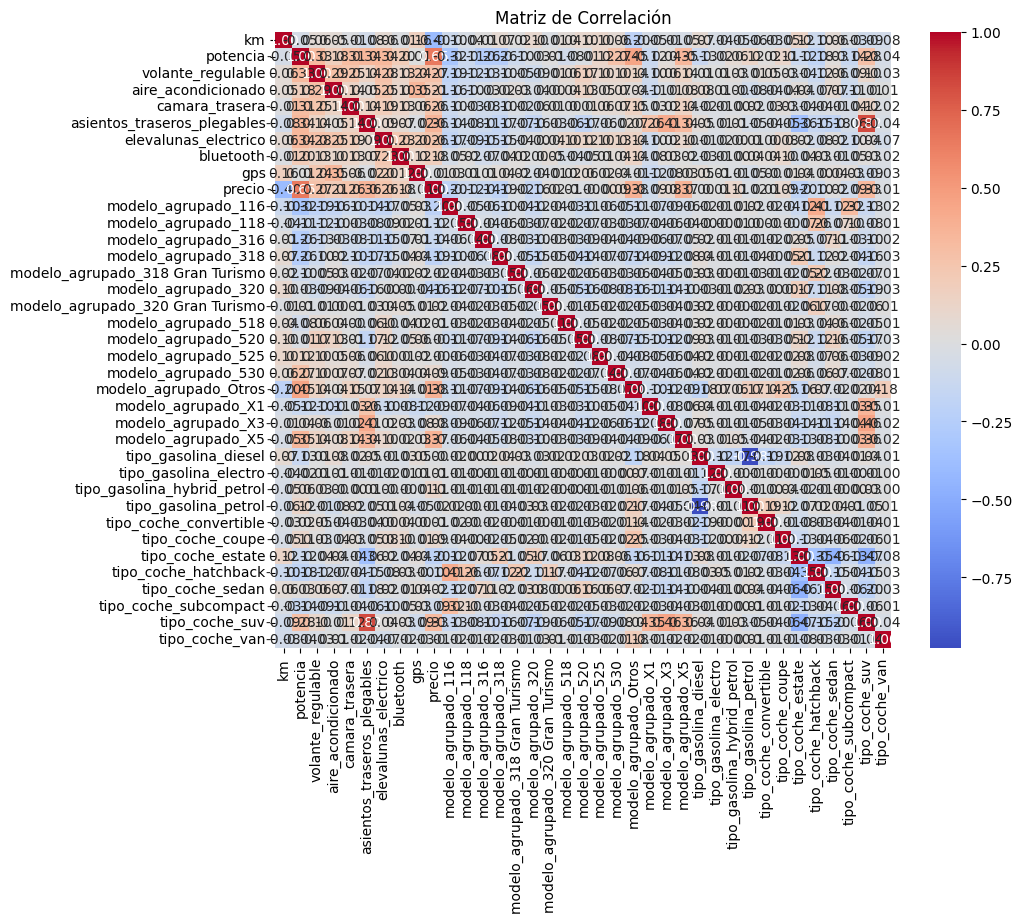

In [146]:
# Calculo de la matriz de correlación
correlation_matrix = bmw_df_encoded.corr()

# Visualización de la matriz de correlación usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Añadido de títulos y etiquetas según sea necesario
plt.title('Matriz de Correlación')
plt.show()

Es bastante engorroso poder ver algo en la matriz anterior. Así que voy a establecer un filtrado por umbral de correlación para poder sacar conclusiones precisas. En este punto, nos piden saber que variables estan correlacionadas así que estableceré un umbral de |0.5| para correlaciones moderadas y otra con un umbral de |0.7| para fuertes.



####**Correlaciones fuertes**

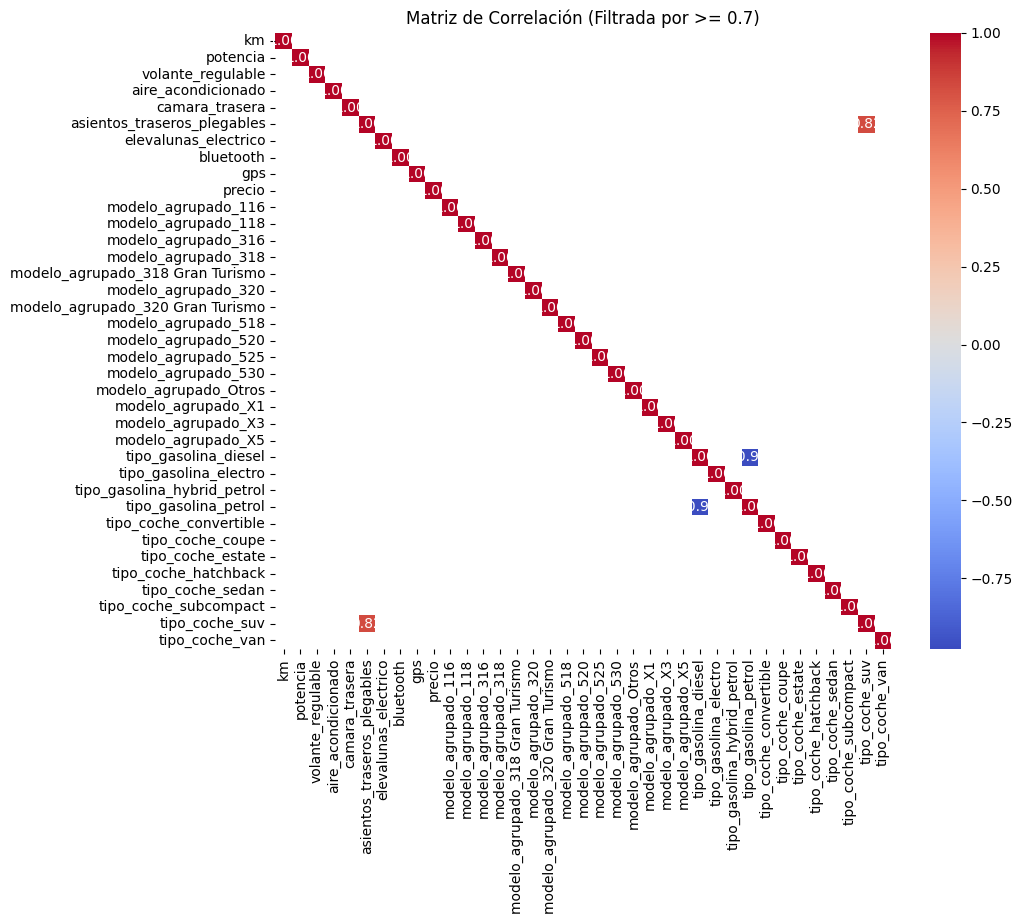

In [147]:
# Defino el umbral de correlación
threshold = 0.7

# Creo una máscara para filtrar las correlaciones según el umbral
# Uso 'abs()' para considerar valores de correlación tanto positivos como negativos
mask = abs(correlation_matrix) >= threshold

# Aplico la máscara a la matriz de correlación
filtered_correlation = correlation_matrix[mask]

# Visualizo la matriz de correlación filtrada usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, mask=~mask)

# Añado títulos y etiquetas según sea necesario
plt.title(f'Matriz de Correlación (Filtrada por >= {threshold})')
plt.show()

####**Correlaciones moderadas**

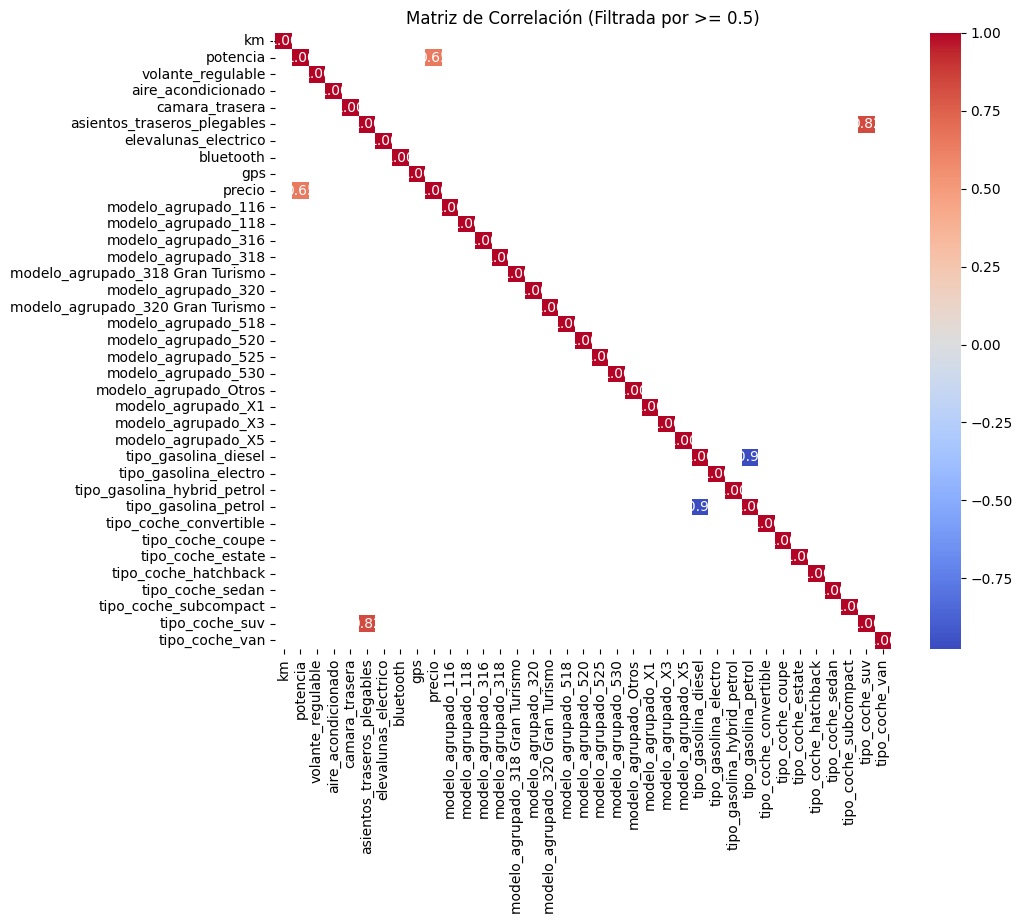

In [148]:
# Defino el umbral de correlación
threshold = 0.5

# Creo una máscara para filtrar las correlaciones según el umbral
# Uso 'abs()' para considerar valores de correlación tanto positivos como negativos
mask = abs(correlation_matrix) >= threshold

# Aplico la máscara a la matriz de correlación
filtered_correlation = correlation_matrix[mask]

# Visualizo la matriz de correlación filtrada usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, mask=~mask)

# Añado títulos y etiquetas según sea necesario
plt.title(f'Matriz de Correlación (Filtrada por >= {threshold})')
plt.show()

## **Análisis variable vs target**

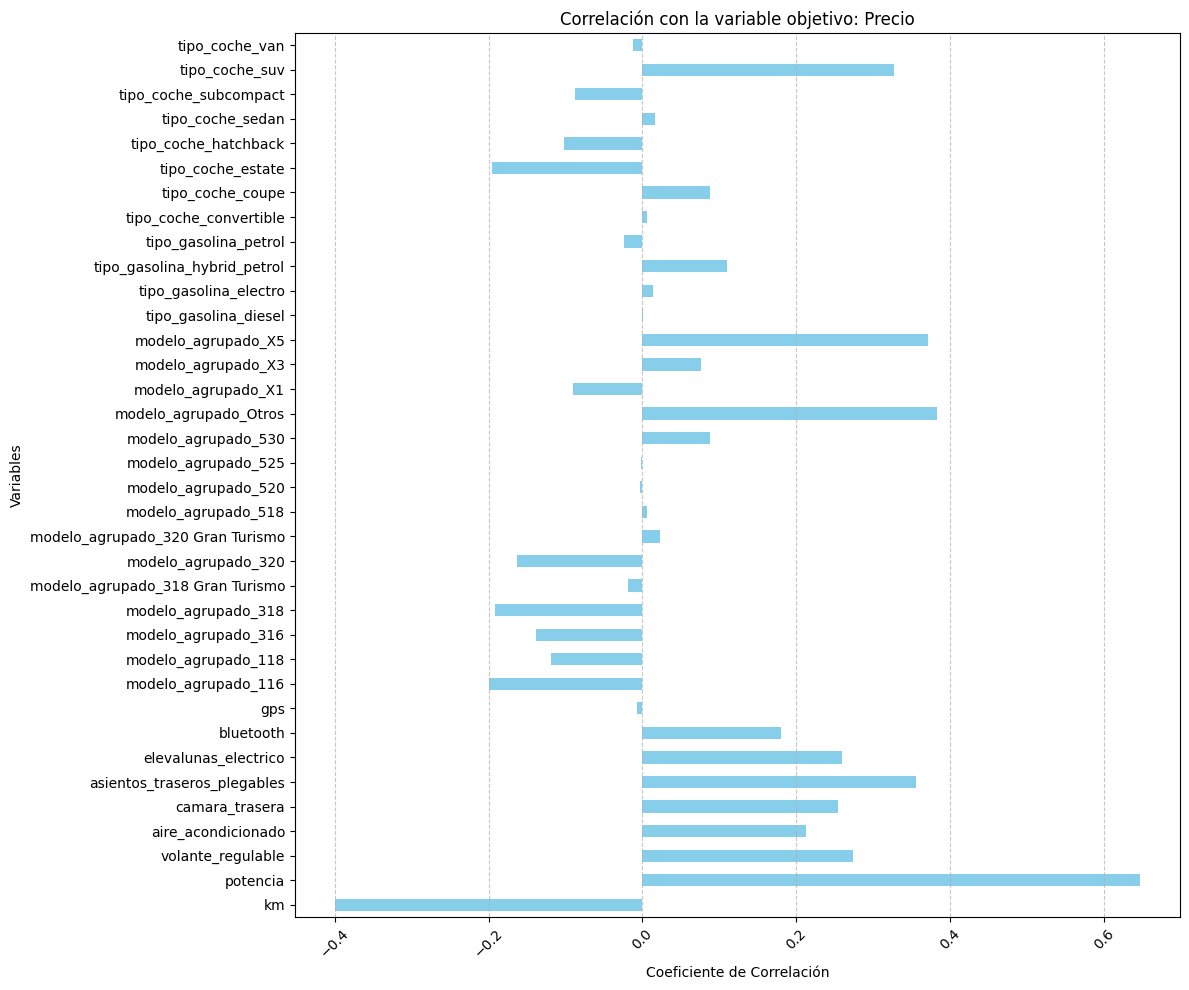

In [149]:
# Extracción de las correlaciones de la variable objetivo (precio) con el resto
target_correlation = correlation_matrix['precio'].drop('precio')  # Eliminación de la correlación de la variable consigo misma

# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 10))  # Aumento de estas dimensiones

# Creación del gráfico de barras horizontal
target_correlation.plot(kind='barh', color='skyblue')  # Cambiado de 'bar' por 'barh' para hacerlo horizontal

plt.title('Correlación con la variable objetivo: Precio')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables')
plt.xticks(rotation=45)  # Ajuste de la rotación
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajuste de los márgenes y el espaciado
plt.tight_layout()

plt.show()

Veámos las correlaciones leves. Con valores de entre 0.3 hasta 0.5

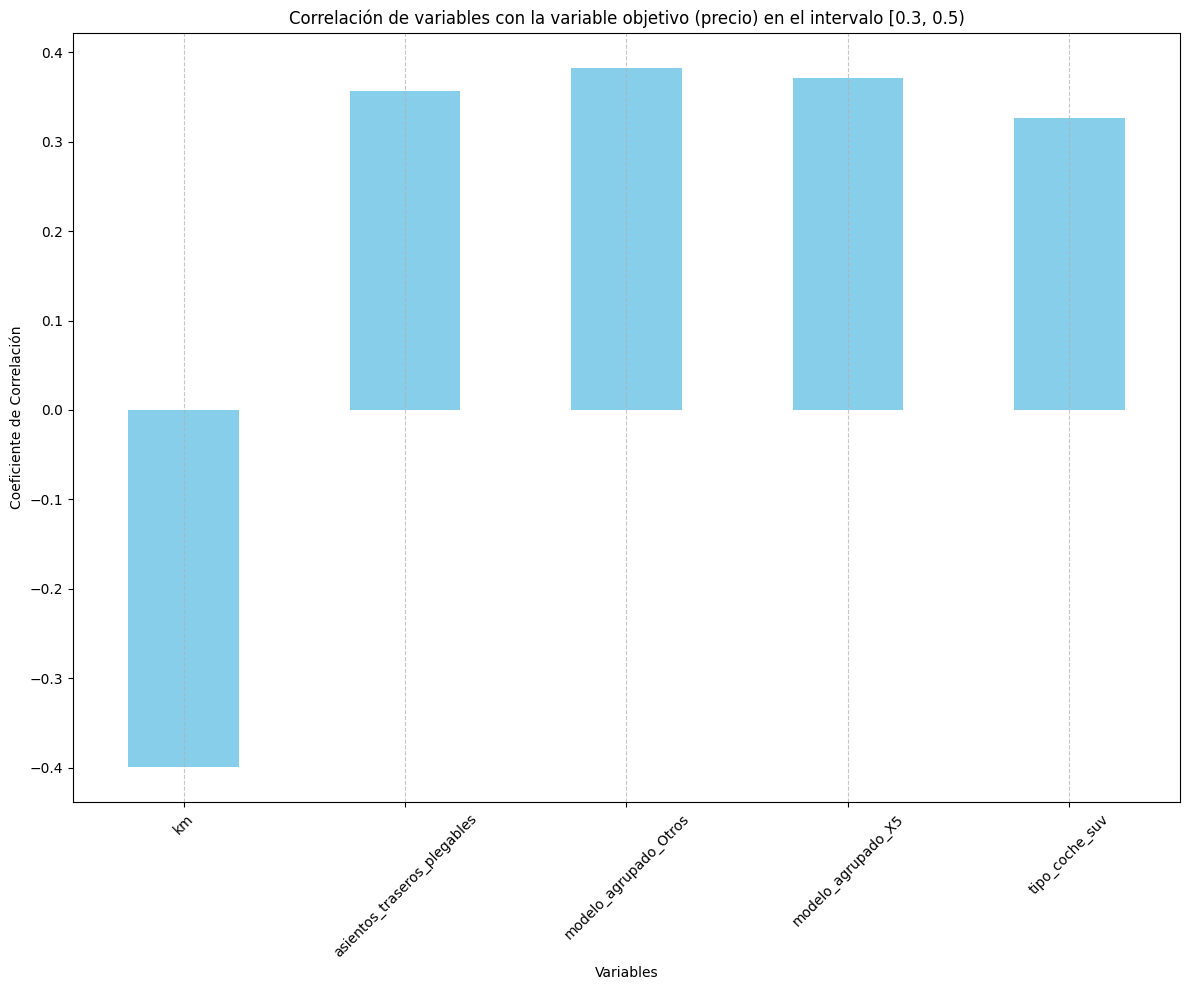

In [150]:
# Filtrado de las correlaciones para que estén en el intervalo de 0.3 a 0.5
intervalo_correlacion = target_correlation[(abs(target_correlation) >= 0.3) & (abs(target_correlation) < 0.5)]

plt.figure(figsize=(12, 10))  # Aumento de estas dimensiones según sea necesario
intervalo_correlacion.plot(kind='bar', color='skyblue')
plt.title('Correlación de variables con la variable objetivo (precio) en el intervalo [0.3, 0.5)')
plt.xlabel('Variables')
plt.ylabel('Coeficiente de Correlación')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Interpretación: La variable 'km' tiene una correlación negativa leve tirando a moderada con nuestro target objetivo 'precio' con una corr de aproximadamente 0.4.
Luego, las variables ('asientos_traseros_plegables', 'modelo_agrupado_Otros', 'modelo_agrupado_X5', y 'tipo_coche_suv') también influyen levemente en este caso incrementando el precio con correlaciones que oscilan entre 0.3 y 0.5.

Veámos las correlaciones moderadas. Con valores de entre 0.5 hasta 0.7

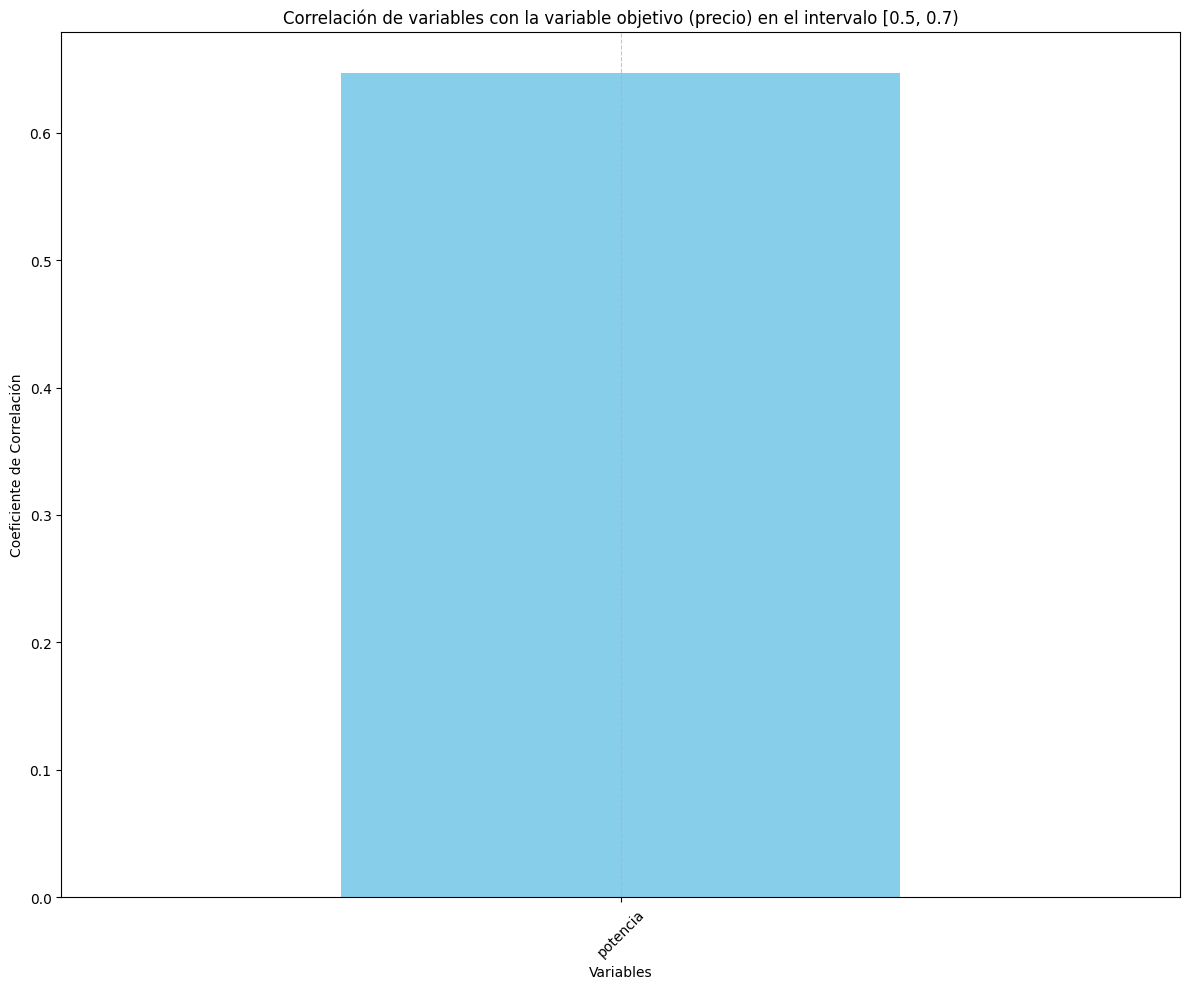

In [151]:
# Filtrado de las correlaciones para que estén en el intervalo de 0.5 a 0.7
intervalo_correlacion = target_correlation[(abs(target_correlation) >= 0.5) & (abs(target_correlation) < 0.7)]

plt.figure(figsize=(12, 10))  # Aumento de estas dimensiones según sea necesario
intervalo_correlacion.plot(kind='bar', color='skyblue')
plt.title('Correlación de variables con la variable objetivo (precio) en el intervalo [0.5, 0.7)')
plt.xlabel('Variables')
plt.ylabel('Coeficiente de Correlación')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

En este punto únicamente vemos la variable 'potencia' como ya habíamos visto antes con un coeficiente de correlación de aproximadamente 0.64 afectando de modo que a mayor potencia mayor será el precio.

Veámos las correlaciones fuertes. Con valores de coeficientes de correlación superiores o iguales a  0.7

Dejo comentada la siguiente celda de código ya que no hay ninguna variable que supere ese coeficiente de correlación.

In [152]:
# # Filtrado de las correlaciones para que estén a partir de 0.7
# intervalo_correlacion = target_correlation[(abs(target_correlation) >= 0.7)]

# plt.figure(figsize=(12, 10))  # Aumento de estas dimensiones según sea necesario
# intervalo_correlacion.plot(kind='bar', color='skyblue')
# plt.title('Correlación de variables con la variable objetivo (precio) a partir de 0.7)')
# plt.xlabel('Variables')
# plt.ylabel('Coeficiente de Correlación')
# plt.xticks(rotation=45)
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.tight_layout()

# plt.show()

## **Escalar variables**

In [153]:
bmw_df_encoded.dtypes

km                                  float64
potencia                            float64
volante_regulable                      bool
aire_acondicionado                     bool
camara_trasera                         bool
asientos_traseros_plegables            bool
elevalunas_electrico                   bool
bluetooth                              bool
gps                                    bool
precio                              float64
modelo_agrupado_116                   uint8
modelo_agrupado_118                   uint8
modelo_agrupado_316                   uint8
modelo_agrupado_318                   uint8
modelo_agrupado_318 Gran Turismo      uint8
modelo_agrupado_320                   uint8
modelo_agrupado_320 Gran Turismo      uint8
modelo_agrupado_518                   uint8
modelo_agrupado_520                   uint8
modelo_agrupado_525                   uint8
modelo_agrupado_530                   uint8
modelo_agrupado_Otros                 uint8
modelo_agrupado_X1              

In [154]:
# Selección de las columnas numéricas 'float64'
columns_to_scale = bmw_df_encoded.select_dtypes(include=['float64']).columns

# Inicializa el MinMaxScaler
scaler = MinMaxScaler()

# Aplica el escalado solo a las columnas seleccionadas
bmw_df_encoded[columns_to_scale] = scaler.fit_transform(bmw_df_encoded[columns_to_scale])

# Verifica las primeras filas para asegurarte de que el escalado se aplicó correctamente
print(bmw_df_encoded.head())


         km  potencia  volante_regulable  aire_acondicionado  camara_trasera  \
0  0.494232  0.095238               True                True           False   
1  0.047514  0.703081               True                True           False   
2  0.645700  0.151261              False               False           False   
3  0.450522  0.193277               True                True           False   
4  0.341253  0.263305               True                True           False   

   asientos_traseros_plegables  elevalunas_electrico  bluetooth   gps  \
0                        False                  True      False  True   
1                        False                 False       True  True   
2                        False                  True      False  True   
3                        False                  True       True  True   
4                        False                 False       True  True   

     precio  ...  tipo_gasolina_hybrid_petrol  tipo_gasolina_petrol  \
0  0.0601

In [155]:
bmw_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4707 entries, 0 to 4842
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   km                                4707 non-null   float64
 1   potencia                          4707 non-null   float64
 2   volante_regulable                 4707 non-null   bool   
 3   aire_acondicionado                4707 non-null   bool   
 4   camara_trasera                    4707 non-null   bool   
 5   asientos_traseros_plegables       4707 non-null   bool   
 6   elevalunas_electrico              4707 non-null   bool   
 7   bluetooth                         4707 non-null   bool   
 8   gps                               4707 non-null   bool   
 9   precio                            4707 non-null   float64
 10  modelo_agrupado_116               4707 non-null   uint8  
 11  modelo_agrupado_118               4707 non-null   uint8  
 12  modelo

In [156]:
# Seleccionar las primeras 50 filas del DataFrame
bmw_df_encoded_first_50 = bmw_df_encoded.head(50)

# Exportar a Excel
bmw_df_encoded_first_50.to_excel("/content/drive/MyDrive/Entregable_01_Data_Preparation/Dataset/bmw_df_encoded.xlsx", index=False)


OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/Entregable_01_Data_Preparation/Dataset'